In [63]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
#Globals
COMBINED_DATA = joblib.load('/Users/ryangeygan/garbage/FBN/reinterviewdataproblem/combined_data.data')

In [3]:
#Rename yield column since 'yield' is a reserved Python syntactical word
COMBINED_DATA = COMBINED_DATA.rename(columns={'yield':'grain_yield'})

In [57]:
def clean_data(data: pd.DataFrame) -> pd.DataFrame:
    """

    """
    
    #Remove speed data and rows where any data missing
    data = data.drop(labels=['speed'],axis=1)
    data = data.dropna()
    
    #Keep average grain yield from rows where planting data is duplicated
    data = data.groupby(['variety', 'seeding_rate', 'seed_spacing']).mean().reset_index()


    #Remove rows where any of the continuous vars are zero (indicates sensor malfunction)
    data = data.loc[~((data['seeding_rate'] == 0) |
                      (data['seed_spacing'] == 0) |
                      (data['grain_yield'] == 0))]


    return data

In [58]:
data = clean_data(COMBINED_DATA)

In [59]:
data.head()

,variety,seeding_rate,seed_spacing,grain_yield
1,DKC63-33RIB,4.5880,45.5728,144.765757
2,DKC63-33RIB,5.5830,37.4508,198.290058
3,DKC63-33RIB,12.1870,17.1566,192.640818
4,DKC63-33RIB,24.9161,8.3917,215.595804
5,DKC63-33RIB,28.3061,7.3867,213.935991


To visualize the pairwise relationship between variables, a scatter matrix is the most succint method. Unfortunately, you may have to play with the sizes here to make this fit and readable. These settings work on my laptop but could be different for you.

Each of the following two plots are scatter matrices of seeding rate, seed spacing, and yield on a per cultivar basis

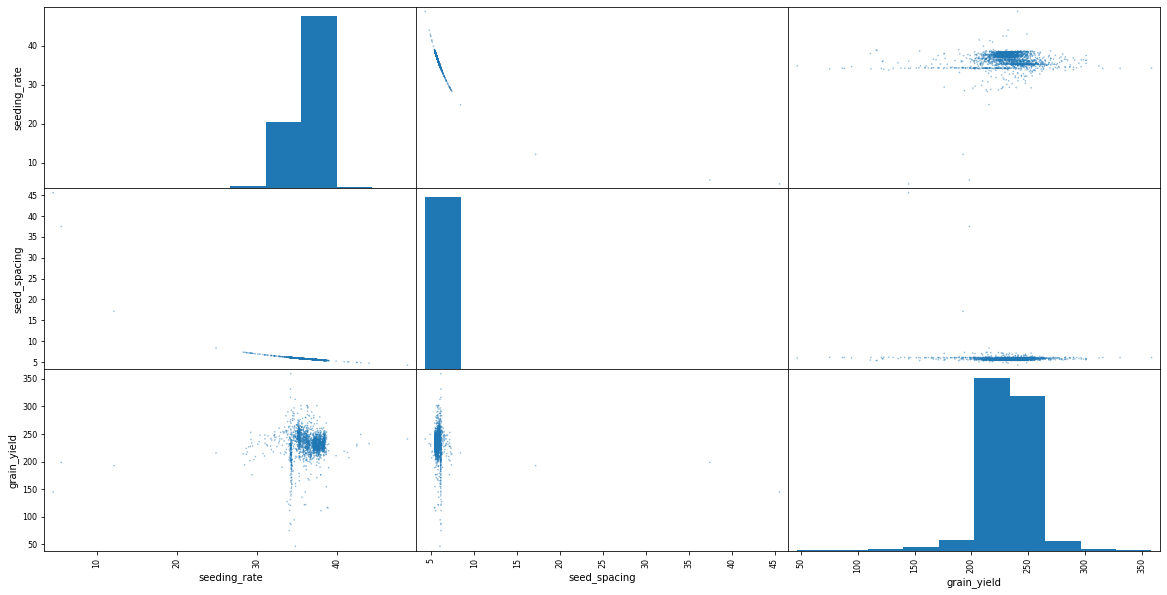

In [60]:
pd.plotting.scatter_matrix(data.loc[data.variety=='DKC63-33RIB',['seeding_rate','seed_spacing','grain_yield']],s=10)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 10})

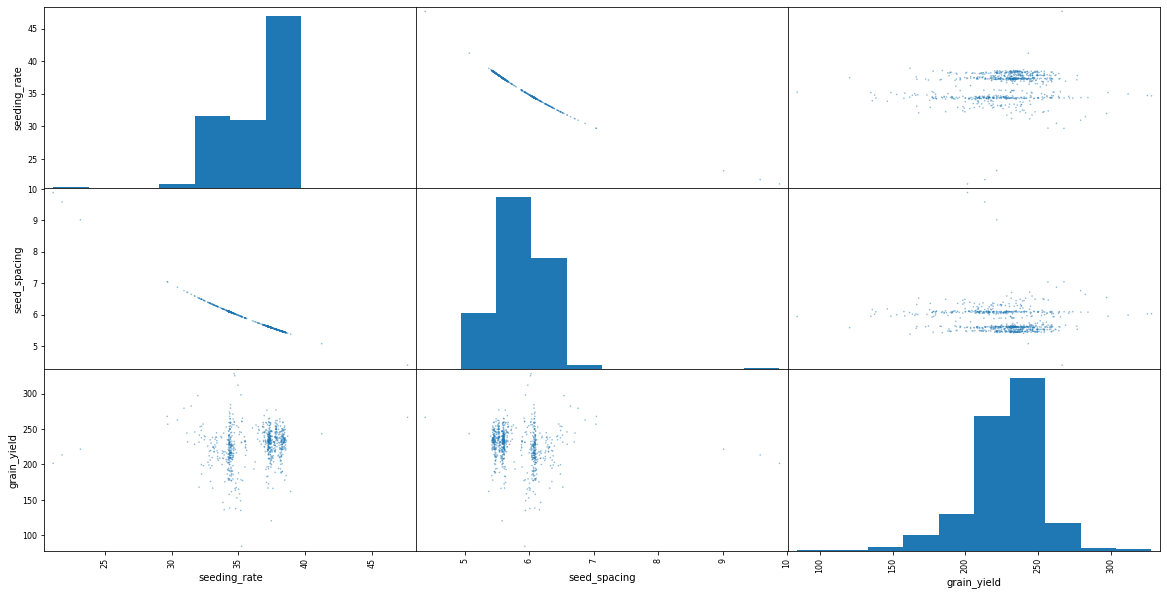

In [61]:
pd.plotting.scatter_matrix(data.loc[data.variety=='P1498',['seeding_rate','seed_spacing','grain_yield']],s=10)
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 10})

In [64]:
P1498 = np.array(data.loc[data.variety=='P1498','grain_yield'])
DKC63 = np.array(data.loc[data.variety=='DKC63-33RIB','grain_yield'])

In [65]:
stats.levene(P1498,DKC63)

LeveneResult(statistic=26.668079221492345, pvalue=2.586190601344471e-07)

In [66]:
stats.ttest_ind(P1498,DKC63,equal_var=False)

Ttest_indResult(statistic=-4.785332143479455, pvalue=1.9298616467915933e-06)

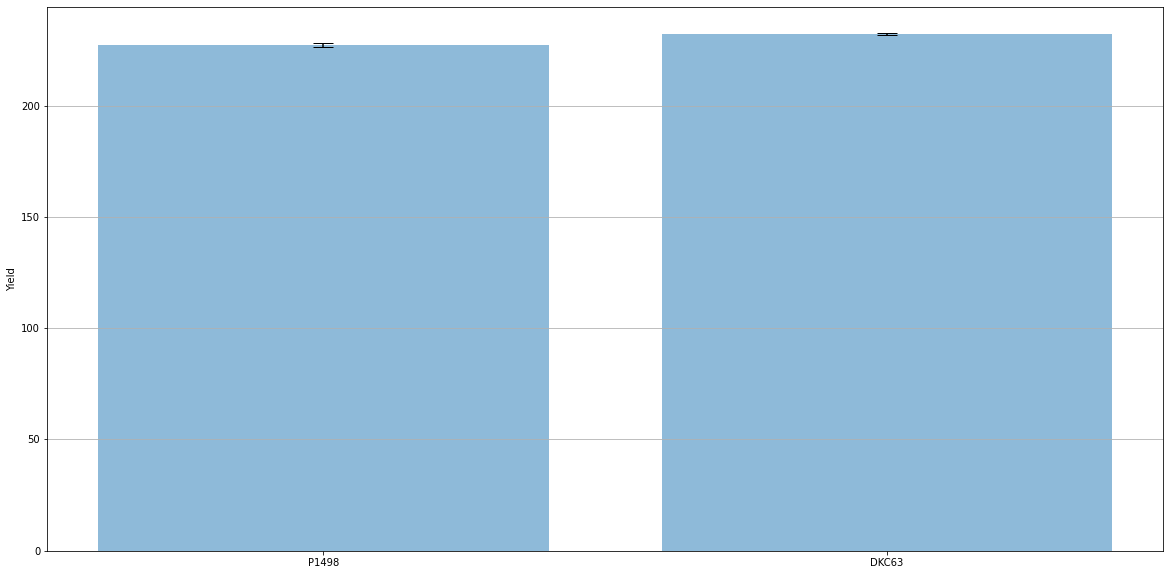

In [67]:
P1498__mean = P1498.mean()
DKC63_mean = DKC63.mean()

P1498_sem = stats.sem(P1498)
DKC63_sem = stats.sem(DKC63)

labels = ['P1498', 'DKC63']
x_pos = np.arange(len(labels))
CTEs = [P1498__mean, DKC63_mean]
error = [P1498_sem, DKC63_sem]

fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Yield')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('')
ax.yaxis.grid(True)

The standard errors are very small for each set of yield data. Although there is relatively small difference in yeilds (around 5 bu/acre), the difference is significant.